**1.** Posterior predictive checking:

**(a**) On page 120, the data from the SAT coaching experiments were checked against the
model that assumed identical effects in all eight schools: the expected order statistics
of the effect sizes were (26, 19, 14, 10, 6, 2, −3, −9), compared to observed data of (28,
18, 12, 8, 7, 1, −1, −3). Express this comparison formally as a posterior predictive
check comparing this model to the data. Does the model fit the aspect of the data
tested here?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
y = np.array([28,8,-3,7,-1,1,18,12])
sig = np.array([15,10,16,11,9,11,10,18])
ys = np.sort(y)

In [5]:
def Tstat(y): return np.max(y) - np.min(y)

In [6]:
# Eq. 5.13 and page 120
posterior_mean = np.sum(1/sig**2 * y) / np.sum(1/sig**2)
posterior_std = np.sqrt(1/np.sum(1/sig**2))

In [7]:
n = len(y)
S = 1000
yrep = np.zeros((S, n))
Trep = []

for i in range(S):
    theta = st.norm.rvs(posterior_mean, posterior_std, size = 1)
    yrep[i, :] = np.sort(st.norm.rvs(theta, sig))
    Trep.append(Tstat(yrep[i, :]))

In [8]:
pval = []
for i in range(n):
    pval.append(np.mean(yrep[:, i] > np.sort(y)[i]))

In [9]:
pval

[0.211, 0.41, 0.544, 0.424, 0.574, 0.554, 0.497, 0.367]

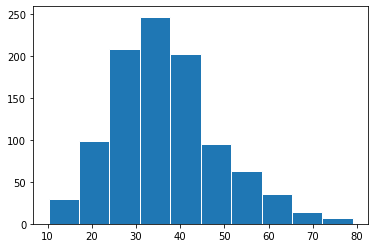

In [10]:
plt.hist(Trep, edgecolor = 'white');